In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-15.275498892474275 -18.463411339098002
-84.64077443658243 -145.47171671346382
29.066511822884564 115.59320662457776
26.520384408740355 -40.35364151240486
39.10135445373476 13.00346965222144
30.491798862567848 115.67739696092792
79.69423954498461 53.62877175952468
54.38259625398533 -48.08716253537685
-69.28286432401606 -73.25302733843371
-12.224517090077043 45.686912122661425
72.46698121696247 -121.75310347861338
-39.06936376870745 -14.126032965532772
-7.84626305902998 -59.724143592996995
34.27746448644126 -92.73158116524463
-1.024858305192538 -177.5881208296902
-82.30797611392947 -32.40688918515238
-36.43791797724086 104.28624434275895
-61.33745916509544 124.62884683196057
78.98186657556681 -137.9203184824898
-88.94771857004419 0.5848518018734126
78.08711366927932 -4.632369184275632
53.88117718918326 16.036431650290808
-49.76674836026842 -13.133998712292652
-24.548796066782685 -64.55828245648
-76.0222432222669 -59.348856845217924
64.39772865933514 -176.25667840493549
8.197809397296155

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | jiujiang
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | terrasini
Processing Record 6 of Set 1 | caohe
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | koungou
Processing Record 11 of Set 1 | norman wells
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | aripuana
Processing Record 14 of Set 1 | malvern
Processing Record 15 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | klaksvik
Processing Record 21 of Set 1 | polczyn-zdroj
Processing R

Processing Record 37 of Set 4 | baruun-urt
Processing Record 38 of Set 4 | esperance
Processing Record 39 of Set 4 | utiroa
City not found. Skipping...
Processing Record 40 of Set 4 | kapaa
Processing Record 41 of Set 4 | arrecife
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | inhambane
Processing Record 44 of Set 4 | port-gentil
Processing Record 45 of Set 4 | barrow
Processing Record 46 of Set 4 | bad essen
Processing Record 47 of Set 4 | port lincoln
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | kalmunai
Processing Record 50 of Set 4 | cam pha
City not found. Skipping...
Processing Record 1 of Set 5 | tiksi
Processing Record 2 of Set 5 | hami
Processing Record 3 of Set 5 | fort nelson
Processing Record 4 of Set 5 | teya
Processing Record 5 of Set 5 | tungor
Processing Record 6 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 5 | dunedin
Processing Record 8 of Set 5 | margat

Processing Record 26 of Set 8 | vila do maio
Processing Record 27 of Set 8 | varhaug
Processing Record 28 of Set 8 | xining
Processing Record 29 of Set 8 | port hueneme
Processing Record 30 of Set 8 | linhares
Processing Record 31 of Set 8 | flinders
Processing Record 32 of Set 8 | praya
Processing Record 33 of Set 8 | morro bay
Processing Record 34 of Set 8 | vestmanna
Processing Record 35 of Set 8 | westport
Processing Record 36 of Set 8 | pangody
Processing Record 37 of Set 8 | mataram
Processing Record 38 of Set 8 | prieska
Processing Record 39 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 8 | alihe
Processing Record 41 of Set 8 | dingle
Processing Record 42 of Set 8 | haines junction
Processing Record 43 of Set 8 | laguna
Processing Record 44 of Set 8 | mahenge
Processing Record 45 of Set 8 | gorele
Processing Record 46 of Set 8 | araouane
Processing Record 47 of Set 8 | opuwo
Processing Record 48 of Set 8 | muzhi
Processing Record 49 of Set 8 | cag

Processing Record 14 of Set 12 | kavali
Processing Record 15 of Set 12 | kolobrzeg
Processing Record 16 of Set 12 | banjar
Processing Record 17 of Set 12 | januaria
Processing Record 18 of Set 12 | hamilton
Processing Record 19 of Set 12 | liverpool
Processing Record 20 of Set 12 | okakarara
Processing Record 21 of Set 12 | samusu
City not found. Skipping...
Processing Record 22 of Set 12 | tavares
Processing Record 23 of Set 12 | gamba
Processing Record 24 of Set 12 | nago
Processing Record 25 of Set 12 | kuche
City not found. Skipping...
Processing Record 26 of Set 12 | vandavasi
Processing Record 27 of Set 12 | vostok
Processing Record 28 of Set 12 | andra
Processing Record 29 of Set 12 | toronto
Processing Record 30 of Set 12 | olden
Processing Record 31 of Set 12 | bilibino
Processing Record 32 of Set 12 | jining
Processing Record 33 of Set 12 | gasa
Processing Record 34 of Set 12 | kimbe
Processing Record 35 of Set 12 | kawhia
Processing Record 36 of Set 12 | meulaboh
Processing 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,80.24,90,20,0.00,MY,2022-11-21 21:21:47
1,Mataura,-46.1927,168.8643,55.47,52,76,6.06,NZ,2022-11-21 21:24:42
2,Jiujiang,29.7333,115.9833,61.09,89,100,5.23,CN,2022-11-21 21:25:31
3,Ribeira Grande,38.5167,-28.7000,67.77,94,40,18.41,PT,2022-11-21 21:24:45
4,Terrasini,38.1460,13.0844,62.22,72,40,18.41,IT,2022-11-21 21:25:32
5,Caohe,30.2297,115.4335,61.47,88,100,3.31,CN,2022-11-21 21:25:32
6,Nanortalik,60.1432,-45.2371,24.62,82,44,9.91,GL,2022-11-21 21:25:33
7,Ushuaia,-54.8000,-68.3000,56.86,51,75,5.75,AR,2022-11-21 21:23:08
8,Koungou,-12.7336,45.2042,78.51,78,0,5.75,YT,2022-11-21 21:25:33
9,Norman Wells,65.2820,-126.8329,21.24,86,20,5.75,CA,2022-11-21 21:25:34


In [15]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2022-11-21 21:21:47,5.4112,100.3354,80.24,90,20,0.00
1,Mataura,NZ,2022-11-21 21:24:42,-46.1927,168.8643,55.47,52,76,6.06
2,Jiujiang,CN,2022-11-21 21:25:31,29.7333,115.9833,61.09,89,100,5.23
3,Ribeira Grande,PT,2022-11-21 21:24:45,38.5167,-28.7000,67.77,94,40,18.41
4,Terrasini,IT,2022-11-21 21:25:32,38.1460,13.0844,62.22,72,40,18.41
...,...,...,...,...,...,...,...,...,...
578,Kattivakkam,IN,2022-11-21 21:41:13,13.2167,80.3167,75.29,88,100,15.79
579,High Prairie,CA,2022-11-21 21:40:09,55.4334,-116.4858,37.65,79,80,8.32
580,Daru,PG,2022-11-21 21:41:14,-9.0763,143.2092,82.63,76,100,3.00
581,Skibbereen,IE,2022-11-21 21:41:14,51.5500,-9.2667,51.12,82,84,32.50


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

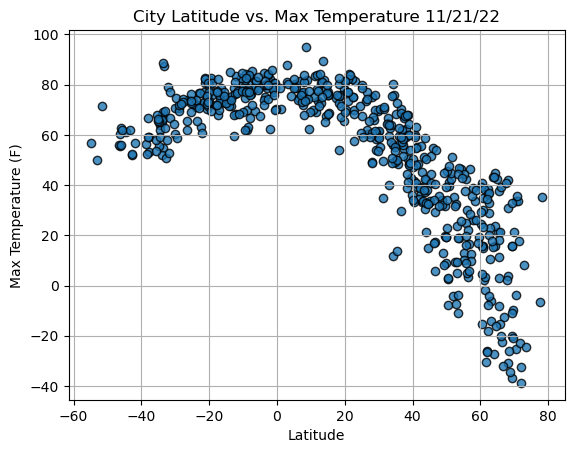

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

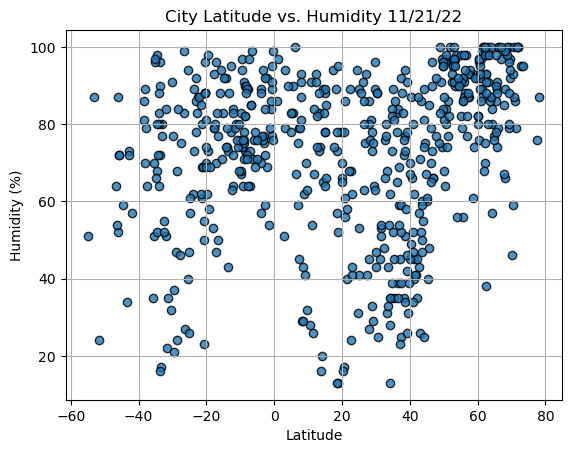

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

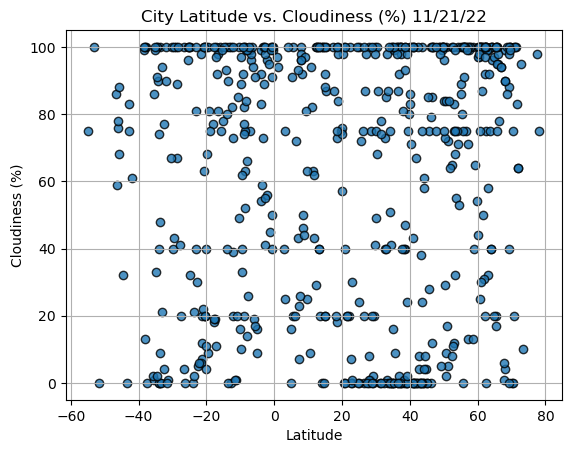

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

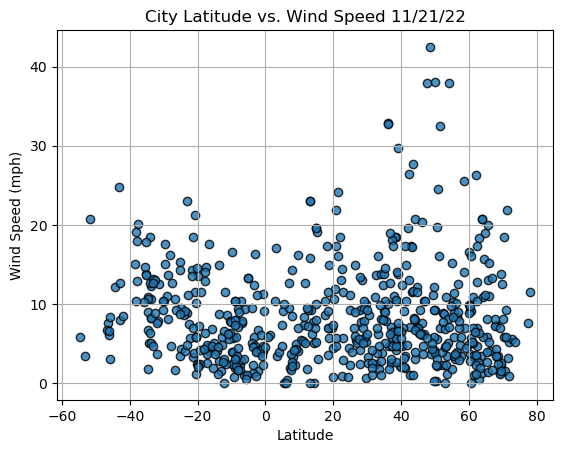

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()